# Import libs

In [1]:
## Run code ###
# !pip install prophet

In [87]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
import pandas as pd
from prophet.plot import plot_plotly,plot_components_plotly
import matplotlib.pyplot as plt
import numpy as np
from neuralprophet import NeuralProphet

In [2]:
url = "/Users/sarthaksingh/code/Sarthak-Singh1996/Tobias-Neubert94/adam_monk_II/adam_monk_II/data/Price_Data_Updated.gzip"
df_price = pd.read_parquet(url)
df_price = df_price[['Ref_Date','Future Price']]

In [5]:
# df_lim = df_price[df_price['Ref_Date']<='2019-12-31']

In [6]:
# df_lim

In [7]:
# df_lim.info()

In [3]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ref_Date      4821 non-null   datetime64[ns]
 1   Future Price  4821 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.5 KB


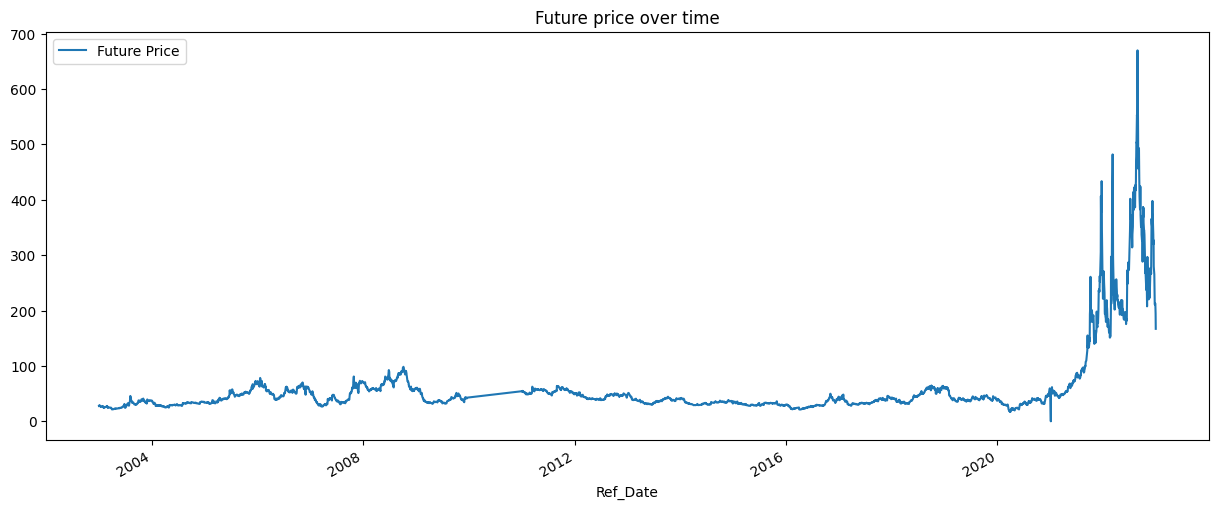

In [4]:
df_price.plot(x='Ref_Date', y='Future Price', figsize=(15,6), title="Future price over time");

In [10]:
# df_lim.plot(x='Ref_Date', y='Future Price', figsize=(15,6), title="Future price over time");

In [11]:
# df_lim.columns = ['ds','y']

In [12]:
df_price.columns = ['ds','y']

## From here we start our amazing Prophet ML model

In [6]:
test_price = df_price[df_price['ds']>='2022-01-01']

In [7]:
test_price

ds       y
4564 2022-01-03  250.00
4565 2022-01-04  271.00
4566 2022-01-05  257.10
4567 2022-01-06  260.00
4568 2022-01-07  250.13
...         ...     ...
4816 2022-12-23  210.97
4817 2022-12-27  212.92
4818 2022-12-28  201.97
4819 2022-12-29  194.34
4820 2022-12-30  167.00

[257 rows x 2 columns]

In [38]:
# df_lim = df_lim.iloc[:3799]

In [8]:
df_price

ds       y
0    2003-01-02   27.63
1    2003-01-03   27.70
2    2003-01-06   29.32
3    2003-01-07   28.25
4    2003-01-08   28.05
...         ...     ...
4816 2022-12-23  210.97
4817 2022-12-27  212.92
4818 2022-12-28  201.97
4819 2022-12-29  194.34
4820 2022-12-30  167.00

[4821 rows x 2 columns]

In [89]:
# df_lim

In [9]:
model = Prophet(daily_seasonality=True)

In [10]:
model.fit(df_price)

20:18:24 - cmdstanpy - INFO - Chain [1] start processing
20:18:26 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
# model.fit(df_lim)

19:55:58 - cmdstanpy - INFO - Chain [1] start processing
19:55:59 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [11]:
forecast = model.predict(test_lim[['ds']])
forecast

NameError: name 'test_lim' is not defined

In [93]:
forecast['yhat']

0      200.549619
1      200.828375
2      201.006132
3      201.333147
4      201.000983
          ...    
252    283.116454
253    281.217168
254    280.923379
255    280.737889
256    279.867330
Name: yhat, Length: 257, dtype: float64

In [12]:
plot_plotly(model,forecast)

NameError: name 'forecast' is not defined

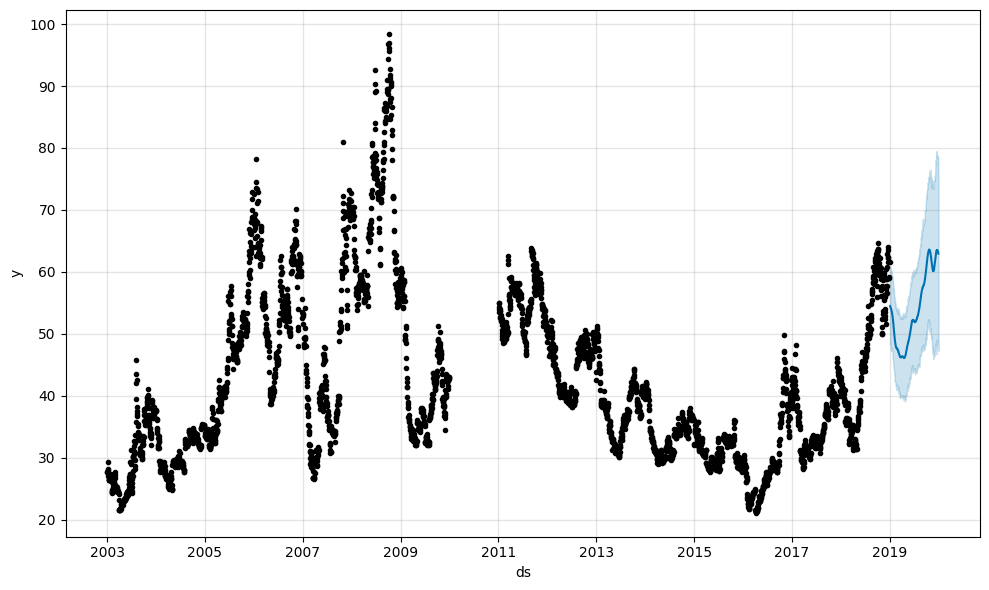

In [49]:
# model.plot(forecast);

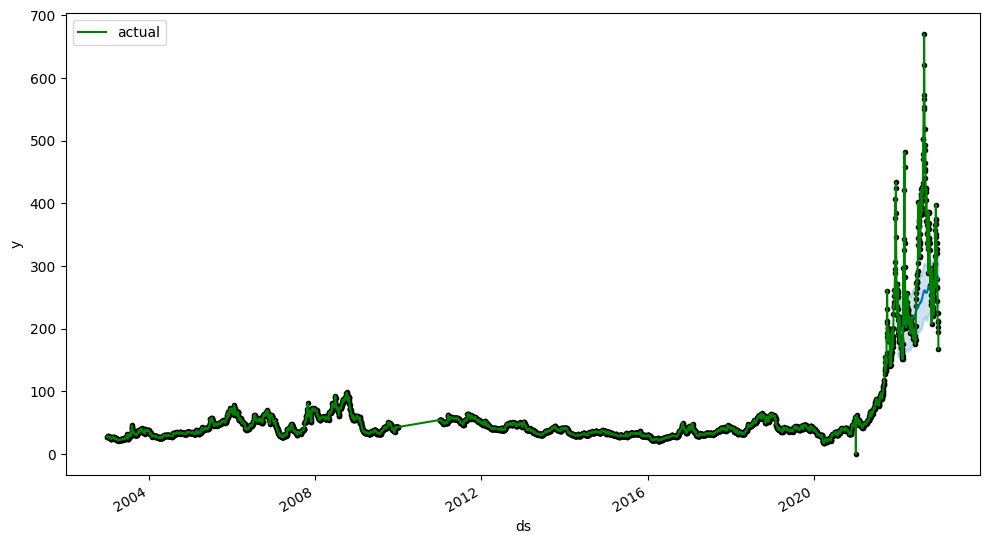

In [95]:
ax = model.plot(forecast).gca()
df_price.plot(ax=ax, x='ds', y='y', label='actual', color='g');

## Calculating residuals

In [96]:
residuals = forecast['yhat'].values - test_lim['y'].values
pd.DataFrame(residuals)

0
0    -49.450381
1    -70.171625
2    -56.093868
3    -58.666853
4    -49.129017
..          ...
252   72.146454
253   68.297168
254   78.953379
255   86.397889
256  112.867330

[257 rows x 1 columns]

## Future predictions

In [50]:
# df_lim

In [97]:
future = model.make_future_dataframe(freq='D', periods=24*30)
future

ds
0    2003-01-02
1    2003-01-03
2    2003-01-06
3    2003-01-07
4    2003-01-08
...         ...
5536 2024-12-15
5537 2024-12-16
5538 2024-12-17
5539 2024-12-18
5540 2024-12-19

[5541 rows x 1 columns]

In [98]:
future_forecast = model.predict(future)
future_forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2003-01-02   26.821775  -16.499446   74.990119    26.821775    26.821775   
1    2003-01-03   26.842213  -16.433943   70.589830    26.842213    26.842213   
2    2003-01-06   26.903527  -17.019128   68.757157    26.903527    26.903527   
3    2003-01-07   26.923965  -13.322072   70.428855    26.923965    26.923965   
4    2003-01-08   26.944403  -16.596359   68.760694    26.944403    26.944403   
...         ...         ...         ...         ...          ...          ...   
5536 2024-12-15  429.908967  385.566827  491.274285   396.037327   458.470940   
5537 2024-12-16  430.122304  379.360656  491.198013   396.187006   458.735550   
5538 2024-12-17  430.335640  380.438531  491.804471   396.336685   459.000160   
5539 2024-12-18  430.548977  385.557589  493.993414   396.486364   459.263607   
5540 2024-12-19  430.762314  384.385177  495.412053   396.636044   459.521623   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0           1.652386              1.652386              1.652386 -2.016963   
1           0.809586              0.809586              0.809586 -2.016963   
2          -0.211330             -0.211330             -0.211330 -2.016963   
3           0.045769              0.045769              0.045769 -2.016963   
4           0.191595              0.191595              0.191595 -2.016963   
...              ...                   ...                   ...       ...   
5536       11.022863             11.022863             11.022863 -2.016963   
5537       10.124664             10.124664             10.124664 -2.016963   
5538       10.233093             10.233093             10.233093 -2.016963   
5539       10.076897             10.076897             10.076897 -2.016963   
5540        9.915393              9.915393              9.915393 -2.016963   

      ...    weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
0     ...  0.289415      0.289415      0.289415   3.379933      3.379933   
1     ... -0.177341     -0.177341     -0.177341   3.003889      3.003889   
2     ... -0.499633     -0.499633     -0.499633   2.305265      2.305265   
3     ... -0.147801     -0.147801     -0.147801   2.210532      2.210532   
4     ...  0.031119      0.031119      0.031119   2.177439      2.177439   
...   ...       ...           ...           ...        ...           ...   
5536  ...  0.252120      0.252120      0.252120  12.787706     12.787706   
5537  ... -0.499633     -0.499633     -0.499633  12.641260     12.641260   
5538  ... -0.147801     -0.147801     -0.147801  12.397856     12.397856   
5539  ...  0.031119      0.031119      0.031119  12.062740     12.062740   
5540  ...  0.289415      0.289415      0.289415  11.642941     11.642941   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         3.379933                   0.0                         0.0   
1         3.003889                   0.0                         0.0   
2         2.305265                   0.0                         0.0   
3         2.210532                   0.0                         0.0   
4         2.177439                   0.0                         0.0   
...            ...                   ...                         ...   
5536     12.787706                   0.0                         0.0   
5537     12.641260                   0.0                         0.0   
5538     12.397856                   0.0                         0.0   
5539     12.062740                   0.0                         0.0   
5540     11.642941                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   28.474161  
1                            0.0   27.651799  
2                            0.0   26.692197  
3                            0.0   26.969734  
4                            0.0   27.135998  
...                          ...         ..

In [99]:
plot_plotly(model,future_forecast)

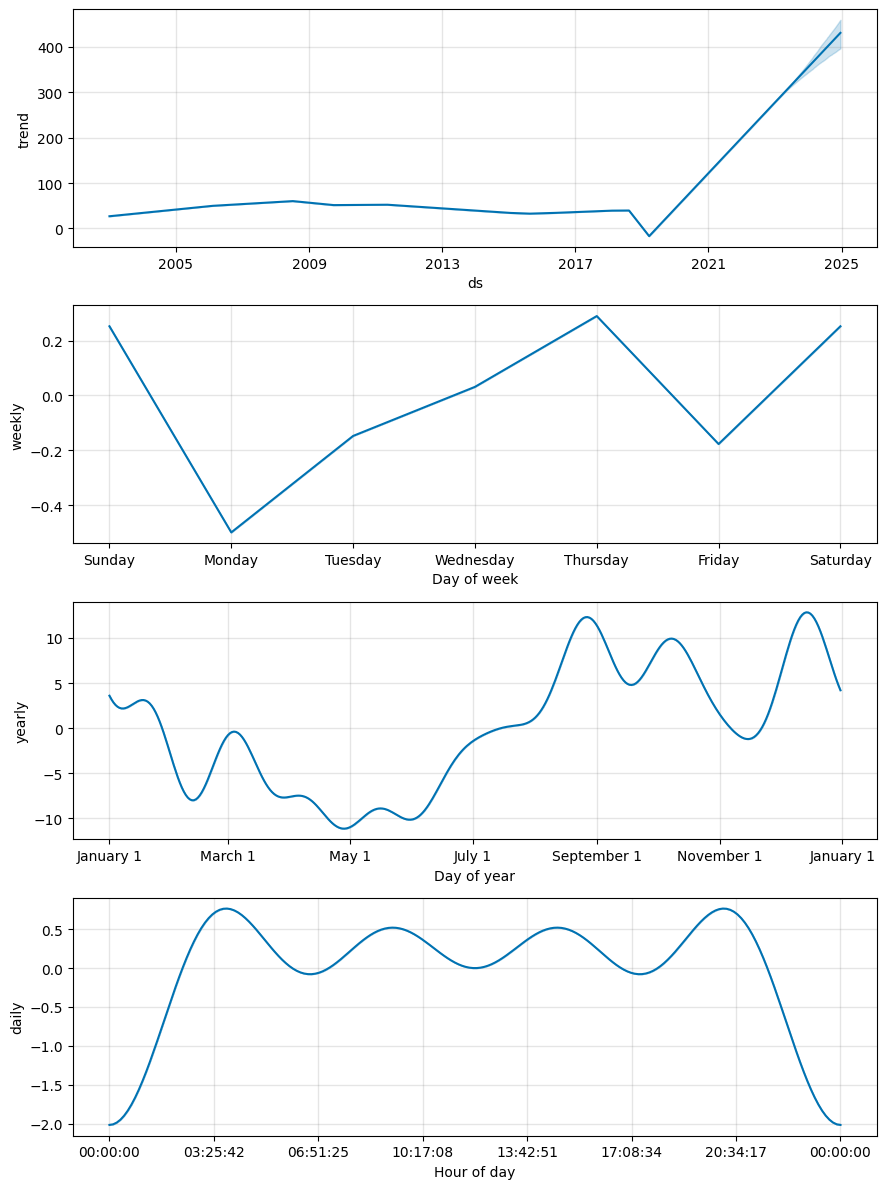

In [100]:
model.plot_components(future_forecast);

In [101]:
df_cv = cross_validation(model, period='180 days', horizon='365 days')

  0%|          | 0/33 [00:00<?, ?it/s]

22:22:19 - cmdstanpy - INFO - Chain [1] start processing
22:22:20 - cmdstanpy - INFO - Chain [1] done processing
22:22:20 - cmdstanpy - INFO - Chain [1] start processing
22:22:20 - cmdstanpy - INFO - Chain [1] done processing
22:22:20 - cmdstanpy - INFO - Chain [1] start processing
22:22:20 - cmdstanpy - INFO - Chain [1] done processing
22:22:20 - cmdstanpy - INFO - Chain [1] start processing
22:22:20 - cmdstanpy - INFO - Chain [1] done processing
22:22:20 - cmdstanpy - INFO - Chain [1] start processing
22:22:21 - cmdstanpy - INFO - Chain [1] done processing
22:22:21 - cmdstanpy - INFO - Chain [1] start processing
22:22:21 - cmdstanpy - INFO - Chain [1] done processing
22:22:21 - cmdstanpy - INFO - Chain [1] start processing
22:22:21 - cmdstanpy - INFO - Chain [1] done processing
22:22:22 - cmdstanpy - INFO - Chain [1] start processing
22:22:22 - cmdstanpy - INFO - Chain [1] done processing
22:22:22 - cmdstanpy - INFO - Chain [1] start processing
22:22:22 - cmdstanpy - INFO - Chain [1]

In [103]:
df_cv

ds        yhat  yhat_lower  yhat_upper       y     cutoff
0    2006-03-27   61.043974   57.327444   64.925003   50.17 2006-03-24
1    2006-03-28   61.216442   57.435521   65.144678   50.20 2006-03-24
2    2006-03-29   61.452101   57.422309   65.180607   50.87 2006-03-24
3    2006-03-30   61.603514   57.641814   65.468577   50.72 2006-03-24
4    2006-03-31   61.886055   57.769635   65.892390   49.59 2006-03-24
...         ...         ...         ...         ...     ...        ...
7845 2022-12-23  132.291009  103.773121  158.108997  210.97 2021-12-30
7846 2022-12-27  130.158915  103.653598  156.853768  212.92 2021-12-30
7847 2022-12-28  129.466662  101.408914  156.603793  201.97 2021-12-30
7848 2022-12-29  128.541626  102.491430  153.403631  194.34 2021-12-30
7849 2022-12-30  127.300711  100.976133  154.031729  167.00 2021-12-30

[7850 rows x 6 columns]

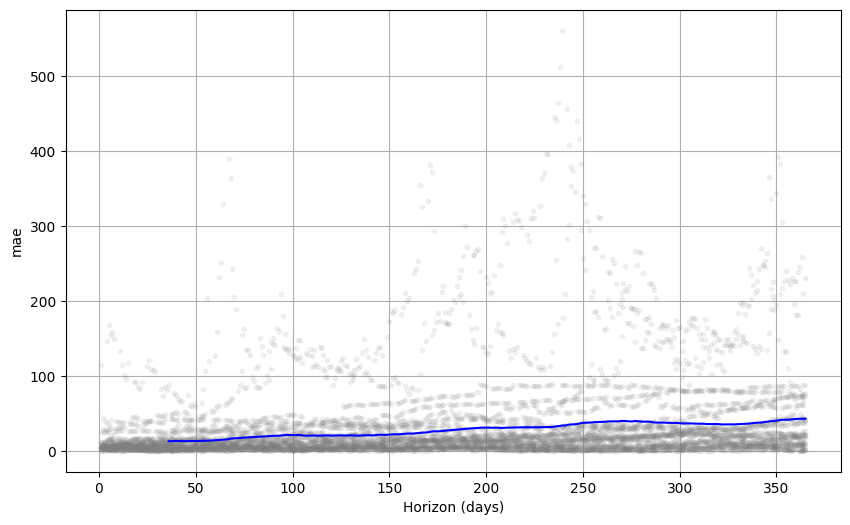

In [104]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

### Creating Unknown data

In [114]:
# Creating unknown data for the model but we have that data to see how well our model is predicting
unknown_data = df_price.iloc[-100:]
data = df_price.iloc[:-100]

In [115]:
unknown_data

ds       y
4721 2022-08-12  416.88
4722 2022-08-15  433.12
4723 2022-08-16  471.56
4724 2022-08-17  478.42
4725 2022-08-18  503.52
...         ...     ...
4816 2022-12-23  210.97
4817 2022-12-27  212.92
4818 2022-12-28  201.97
4819 2022-12-29  194.34
4820 2022-12-30  167.00

[100 rows x 2 columns]

In [116]:
unknown_data['y'] = np.log(unknown_data['y'])

WARNING - (py.warnings._showwarnmsg) - /var/folders/gz/cvjg4psj7sd6hz3rsbh2vd780000gn/T/ipykernel_2982/4274175436.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [117]:
data['y'] = np.log(data['y'])

WARNING - (py.warnings._showwarnmsg) - /Users/sarthaksingh/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log


WARNING - (py.warnings._showwarnmsg) - /var/folders/gz/cvjg4psj7sd6hz3rsbh2vd780000gn/T/ipykernel_2982/3552816311.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [118]:
data = data[~ np.isinf(data['y'])]

In [119]:
new_model = Prophet()
new_model.fit(data) 

20:54:05 - cmdstanpy - INFO - Chain [1] start processing
20:54:06 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
future_dates = new_model.make_future_dataframe(freq='D', periods=24*30)
predictions = new_model.predict(future_dates)

In [121]:
plot_plotly(new_model,predictions)

### Comparing actual vs predictions

In [122]:
pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

In [123]:
pred

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
4720 2022-08-12  5.129897    4.799892    5.449386     5.129897     5.129897   
4723 2022-08-15  5.133875    4.826784    5.469415     5.133875     5.133875   
4724 2022-08-16  5.135201    4.813780    5.472697     5.135201     5.135201   
4725 2022-08-17  5.136527    4.829749    5.469451     5.136527     5.136527   
4726 2022-08-18  5.137853    4.833419    5.483822     5.137853     5.137853   
...         ...       ...         ...         ...          ...          ...   
4853 2022-12-23  5.306242    5.115536    5.807891     5.279891     5.327873   
4857 2022-12-27  5.311546    5.124582    5.818966     5.284314     5.335019   
4858 2022-12-28  5.312872    5.154822    5.812825     5.286246     5.336757   
4859 2022-12-29  5.314198    5.097840    5.810466     5.287398     5.338390   
4860 2022-12-30  5.315523    5.152702    5.757043     5.288078     5.340375   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
4720        0.012586              0.012586              0.012586 -0.000011   
4723        0.009387              0.009387              0.009387 -0.002261   
4724        0.010045              0.010045              0.010045 -0.001513   
4725        0.011544              0.011544              0.011544 -0.000081   
4726        0.012923              0.012923              0.012923  0.001052   
...              ...                   ...                   ...       ...   
4853        0.169107              0.169107              0.169107 -0.000011   
4857        0.157429              0.157429              0.157429 -0.001513   
4858        0.155723              0.155723              0.155723 -0.000081   
4859        0.153588              0.153588              0.153588  0.001052   
4860        0.149179              0.149179              0.149179 -0.000011   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
4720     -0.000011     -0.000011  0.012597      0.012597      0.012597   
4723     -0.002261     -0.002261  0.011648      0.011648      0.011648   
4724     -0.001513     -0.001513  0.011558      0.011558      0.011558   
4725     -0.000081     -0.000081  0.011625      0.011625      0.011625   
4726      0.001052      0.001052  0.011871      0.011871      0.011871   
...            ...           ...       ...           ...           ...   
4853     -0.000011     -0.000011  0.169118      0.169118      0.169118   
4857     -0.001513     -0.001513  0.158942      0.158942      0.158942   
4858     -0.000081     -0.000081  0.155804      0.155804      0.155804   
4859      0.001052      0.001052  0.152536      0.152536      0.152536   
4860     -0.000011     -0.000011  0.149191      0.149191      0.149191   

      multiplicative_terms  multiplicative_terms_lower  \
4720                   0.0                         0.0   
4723                   0.0                         0.0   
4724                   0.0                         0.0   
4725                   0.0                         0.0   
4726                   0.0                         0.0   
...                    ...                         ...   
4853                   0.0                         0.0   
4857                   0.0                         0.0   
4858                   0.0                         0.0   
4859                   0.0                         0.0   
4860                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
4720                         0.0  5.142483  
4723                         0.0  5.143262  
4724                         0.0  5.145246  
4725                         0.0  5.148071  
4726                         0.0  5.150776  
...                          ...       ...  
4853                         0.0  5.475349  
4857                         0.0  5.468975  
4858                         0.0  5.468594  
4859                         0.0  5.467786  
4860                         0.0  5.464703  



In [52]:
pred['yhat'] = np.exp(pred['yhat'])

/var/folders/gz/cvjg4psj7sd6hz3rsbh2vd780000gn/T/ipykernel_2982/1946477675.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
unknown_data['y'] = np.exp(unknown_data['y'])

/var/folders/gz/cvjg4psj7sd6hz3rsbh2vd780000gn/T/ipykernel_2982/264226152.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



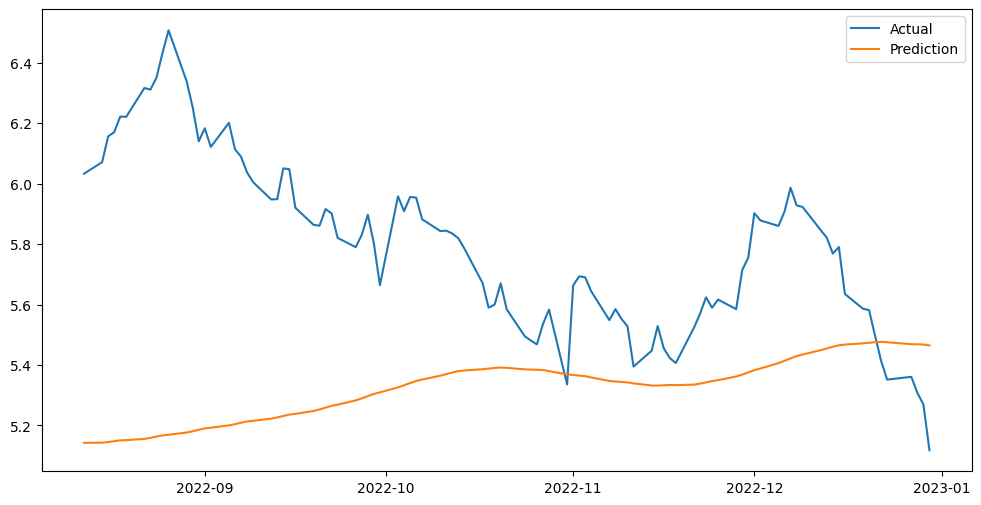

In [124]:
plt.figure(figsize=(12,6))
plt.plot(unknown_data['ds'],unknown_data['y'],label='Actual');
plt.plot(unknown_data['ds'],pred['yhat'],label='Prediction');
plt.legend();

### Removing covid and war

In [133]:
data_ideal = df_price[df_price['ds']<='2019-06-01']

In [134]:
unknown_data_ideal = data_ideal.iloc[-100:]
data_ideal = data_ideal.iloc[:-100]

In [135]:
unknown_data_ideal['y'] = np.log(unknown_data_ideal['y'])
data_ideal['y'] = np.log(data_ideal['y'])

In [136]:
new_model = Prophet(daily_seasonality=True)
new_model.fit(data_ideal) 

21:07:14 - cmdstanpy - INFO - Chain [1] start processing
21:07:16 - cmdstanpy - INFO - Chain [1] done processing


In [137]:
future_dates = new_model.make_future_dataframe(freq='D', periods=24*30)
predictions = new_model.predict(future_dates)

In [138]:
plot_plotly(new_model,predictions)

In [139]:
pred = predictions[predictions['ds'].isin(unknown_data_ideal['ds'])]

In [140]:
pred

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3803 2019-01-09  3.974346    3.935089    4.176672     3.974346     3.974346   
3804 2019-01-10  3.974982    3.930287    4.171063     3.974982     3.974982   
3805 2019-01-11  3.975619    3.927010    4.162813     3.975619     3.975619   
3808 2019-01-14  3.977528    3.922758    4.165654     3.977528     3.977528   
3809 2019-01-15  3.978164    3.920401    4.162579     3.978164     3.978164   
...         ...       ...         ...         ...          ...          ...   
3941 2019-05-27  4.062167    3.791467    4.077985     4.007196     4.101622   
3942 2019-05-28  4.062803    3.801660    4.081101     4.006849     4.103067   
3943 2019-05-29  4.063440    3.801563    4.076287     4.006609     4.104662   
3944 2019-05-30  4.064076    3.790843    4.088099     4.006369     4.105883   
3945 2019-05-31  4.064712    3.800106    4.092113     4.005289     4.108297   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
3803        0.074827              0.074827              0.074827 -0.031486   
3804        0.072876              0.072876              0.072876 -0.031486   
3805        0.071458              0.071458              0.071458 -0.031486   
3808        0.065077              0.065077              0.065077 -0.031486   
3809        0.061245              0.061245              0.061245 -0.031486   
...              ...                   ...                   ...       ...   
3941       -0.129555             -0.129555             -0.129555 -0.031486   
3942       -0.128562             -0.128562             -0.128562 -0.031486   
3943       -0.125342             -0.125342             -0.125342 -0.031486   
3944       -0.123156             -0.123156             -0.123156 -0.031486   
3945       -0.120160             -0.120160             -0.120160 -0.031486   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
3803  ... -0.001408     -0.001408     -0.001408  0.107720      0.107720   
3804  ... -0.001687     -0.001687     -0.001687  0.106049      0.106049   
3805  ... -0.001305     -0.001305     -0.001305  0.104249      0.104249   
3808  ... -0.001154     -0.001154     -0.001154  0.097717      0.097717   
3809  ... -0.002317     -0.002317     -0.002317  0.095047      0.095047   
...   ...       ...           ...           ...       ...           ...   
3941  ... -0.001154     -0.001154     -0.001154 -0.096915     -0.096915   
3942  ... -0.002317     -0.002317     -0.002317 -0.094760     -0.094760   
3943  ... -0.001408     -0.001408     -0.001408 -0.092449     -0.092449   
3944  ... -0.001687     -0.001687     -0.001687 -0.089983     -0.089983   
3945  ... -0.001305     -0.001305     -0.001305 -0.087369     -0.087369   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
3803      0.107720                   0.0                         0.0   
3804      0.106049                   0.0                         0.0   
3805      0.104249                   0.0                         0.0   
3808      0.097717                   0.0                         0.0   
3809      0.095047                   0.0                         0.0   
...            ...                   ...                         ...   
3941     -0.096915                   0.0                         0.0   
3942     -0.094760                   0.0                         0.0   
3943     -0.092449                   0.0                         0.0   
3944     -0.089983                   0.0                         0.0   
3945     -0.087369                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
3803                         0.0  4.049173  
3804                         0.0  4.047858  
3805                         0.0  4.047077  
3808                         0.0  4.042605  
3809                         0.0  4.039409  
...                          ...       ...  
3941                         0.0  3.932612  
3

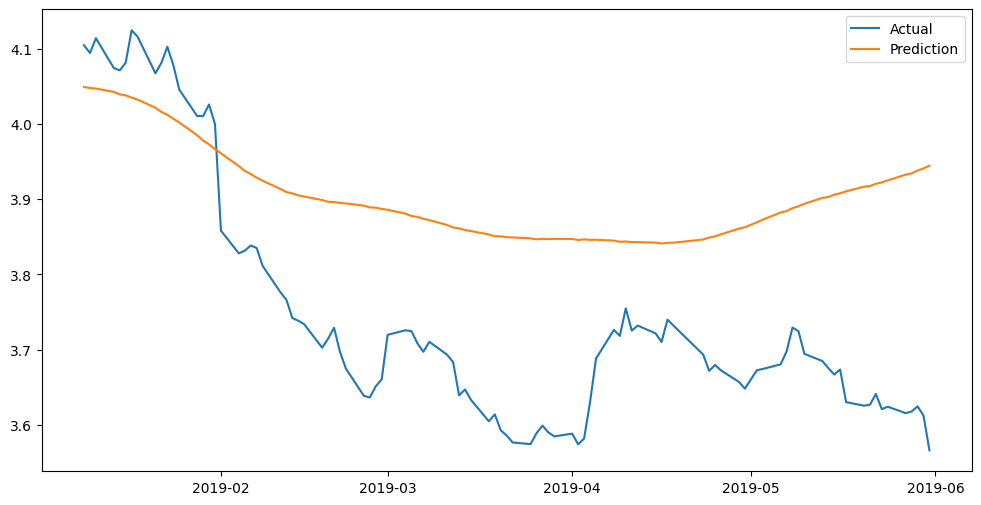

In [141]:
plt.figure(figsize=(12,6))
plt.plot(unknown_data_ideal['ds'],unknown_data_ideal['y'],label='Actual');
plt.plot(unknown_data_ideal['ds'],pred['yhat'],label='Prediction');
plt.legend();

In [65]:
df_cv1 = cross_validation(new_model, period='180 days', horizon='365 days')

  0%|          | 0/25 [00:00<?, ?it/s]

20:09:56 - cmdstanpy - INFO - Chain [1] start processing
20:09:56 - cmdstanpy - INFO - Chain [1] done processing
20:09:56 - cmdstanpy - INFO - Chain [1] start processing
20:09:57 - cmdstanpy - INFO - Chain [1] done processing
20:09:57 - cmdstanpy - INFO - Chain [1] start processing
20:09:57 - cmdstanpy - INFO - Chain [1] done processing
20:09:57 - cmdstanpy - INFO - Chain [1] start processing
20:09:58 - cmdstanpy - INFO - Chain [1] done processing
20:09:58 - cmdstanpy - INFO - Chain [1] start processing
20:09:58 - cmdstanpy - INFO - Chain [1] done processing
20:09:58 - cmdstanpy - INFO - Chain [1] start processing
20:09:58 - cmdstanpy - INFO - Chain [1] done processing
20:09:59 - cmdstanpy - INFO - Chain [1] start processing
20:09:59 - cmdstanpy - INFO - Chain [1] done processing
20:09:59 - cmdstanpy - INFO - Chain [1] start processing
20:10:00 - cmdstanpy - INFO - Chain [1] done processing
20:10:00 - cmdstanpy - INFO - Chain [1] start processing
20:10:01 - cmdstanpy - INFO - Chain [1]

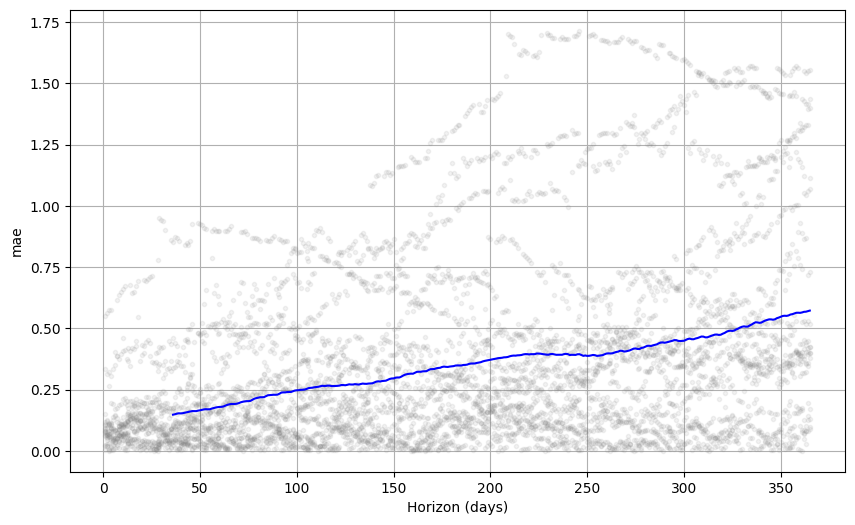

In [66]:
fig = plot_cross_validation_metric(df_cv1, metric='mae')

## Neural prophet

In [125]:
neural_model = NeuralProphet()
neural_model.fit(data,freq='D',epochs=500)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.242% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /Users/sarthaksingh/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (

Finding best initial lr:   0%|          | 0/242 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE      RMSE      Loss  RegLoss  epoch
0    2.271666  2.730247  0.555328      0.0      0
1    2.073213  2.494683  0.484048      0.0      1
2    1.881223  2.270350  0.417326      0.0      2
3    1.683643  2.041022  0.351984      0.0      3
4    1.476725  1.800950  0.287189      0.0      4
..        ...       ...       ...      ...    ...
495  0.192882  0.286669  0.010594      0.0    495
496  0.193092  0.287444  0.010634      0.0    496
497  0.192888  0.286963  0.010602      0.0    497
498  0.192847  0.286960  0.010591      0.0    498
499  0.192985  0.287500  0.010618      0.0    499

[500 rows x 5 columns]

In [126]:
future_dates = neural_model.make_future_dataframe(data, periods=24*30)
predictions = neural_model.predict(future_dates)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.242% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 148it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [127]:
predictions

ds     y     yhat1     trend  season_yearly  season_weekly
0   2022-08-12  None  4.845246  4.816953       0.006393       0.021901
1   2022-08-13  None  5.099638  4.817763       0.006019       0.275855
2   2022-08-14  None  4.435136  4.818572       0.005615      -0.389051
3   2022-08-15  None  4.844553  4.819383       0.005187       0.019984
4   2022-08-16  None  4.847211  4.820192       0.004742       0.022278
..         ...   ...       ...       ...            ...            ...
715 2024-07-27  None  5.677426  5.395926       0.005645       0.275855
716 2024-07-28  None  5.013780  5.396735       0.006096      -0.389051
717 2024-07-29  None  5.424024  5.397545       0.006494       0.019984
718 2024-07-30  None  5.427472  5.398355       0.006840       0.022278
719 2024-07-31  None  5.430737  5.399164       0.007130       0.024443

[720 rows x 6 columns]

In [128]:
neural_model.plot(predictions)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '8a5dbb88-5e76-4fa1-bfda-7e06e2eaf96c',
              'x': array([datetime.datetime(2022, 8, 12, 0, 0),
                          datetime.datetime(2022, 8, 13, 0, 0),
                          datetime.datetime(2022, 8, 14, 0, 0), ...,
                          datetime.datetime(2024, 7, 29, 0, 0),
                          datetime.datetime(2024, 7, 30, 0, 0),
                          datetime.datetime(2024, 7, 31, 0, 0)], dtype=object),
              'y': array([4.84524632, 5.09963751, 4.43513632, ..., 5.42402363, 5.42747211,
                          5.4307375 ])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '53538b

In [129]:
pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

In [131]:
pred['yhat1'] = np.exp(pred['yhat1'])
unknown_data['y'] = np.exp(unknown_data['y'])

WARNING - (py.warnings._showwarnmsg) - /var/folders/gz/cvjg4psj7sd6hz3rsbh2vd780000gn/T/ipykernel_2982/3221170818.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WARNING - (py.warnings._showwarnmsg) - /var/folders/gz/cvjg4psj7sd6hz3rsbh2vd780000gn/T/ipykernel_2982/3221170818.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




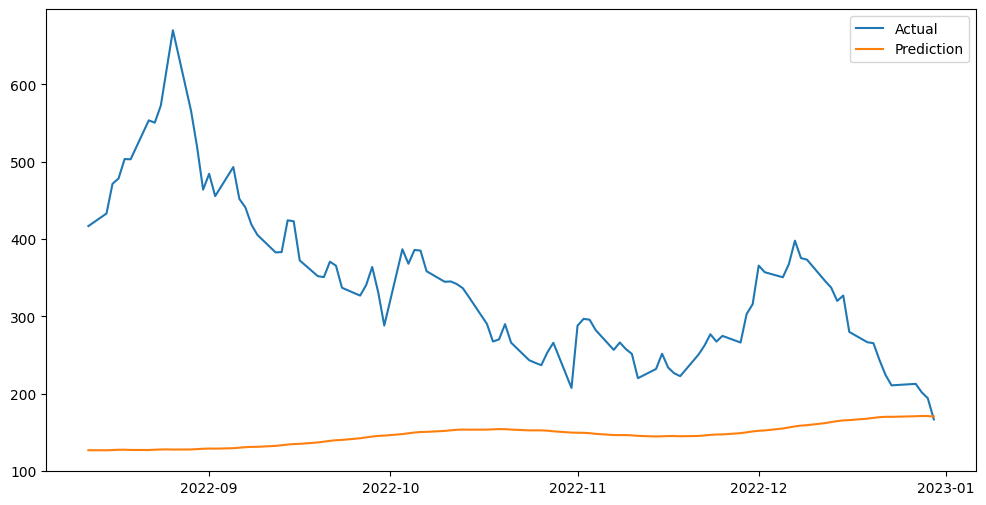

In [132]:
plt.figure(figsize=(12,6))
plt.plot(unknown_data['ds'],unknown_data['y'],label='Actual');
plt.plot(unknown_data['ds'],pred['yhat1'],label='Prediction');
plt.legend();

In [146]:
data_ideal = df_price[df_price['ds']<='2019-06-01']
unknown_data_ideal = data_ideal.iloc[-100:]
data_ideal = data_ideal.iloc[:-100]

In [ ]:
unknown_data_ideal['y'] = np.log(unknown_data_ideal['y'])
data_ideal['y'] = np.log(data_ideal['y'])

In [147]:
neural_model = NeuralProphet()
neural_model.fit(data_ideal,freq='D',epochs=500)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.08% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /Users/sarthaksingh/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (1

Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE       RMSE      Loss  RegLoss  epoch
0    36.832752  45.738194  0.318584      0.0      0
1    34.232025  42.598907  0.282672      0.0      1
2    31.642002  39.457737  0.248267      0.0      2
3    29.075834  36.342342  0.215061      0.0      3
4    26.492847  33.122410  0.183049      0.0      4
..         ...        ...       ...      ...    ...
495   5.228311   6.655559  0.007483      0.0    495
496   5.226313   6.641495  0.007478      0.0    496
497   5.224486   6.650127  0.007476      0.0    497
498   5.226431   6.666970  0.007480      0.0    498
499   5.226843   6.640862  0.007482      0.0    499

[500 rows x 5 columns]

In [143]:
future_dates = neural_model.make_future_dataframe(data_ideal, periods=24*30)
predictions = neural_model.predict(future_dates)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.08% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 119it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [144]:
pred = predictions[predictions['ds'].isin(unknown_data_ideal['ds'])]

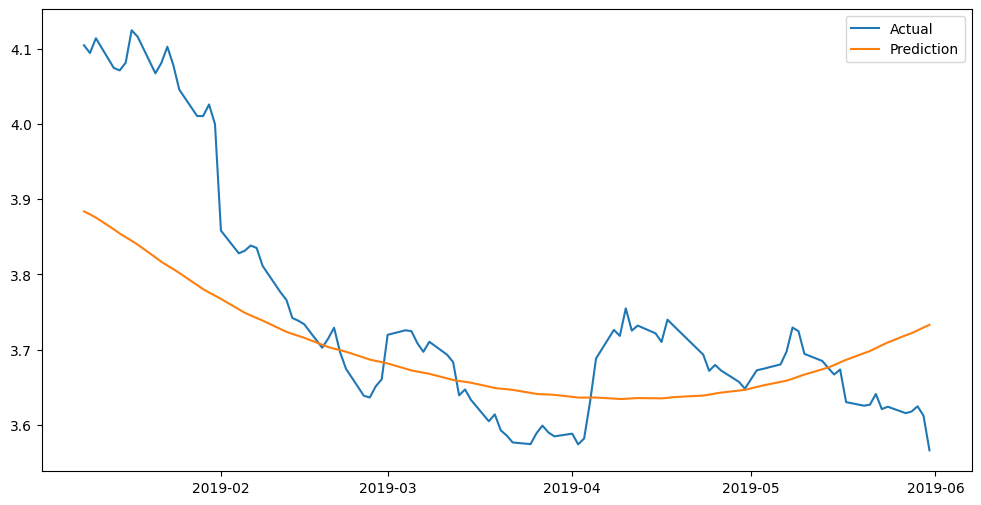

In [145]:
plt.figure(figsize=(12,6))
plt.plot(unknown_data_ideal['ds'],unknown_data_ideal['y'],label='Actual');
plt.plot(unknown_data_ideal['ds'],pred['yhat1'],label='Prediction');
plt.legend();